# Read and Parse Chainer logs

# CIFAR100 runs with same hyper-parameters
## 24 runs x 500 epochs on DL server 
b512 l0.15

In [15]:
%matplotlib inline
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import subprocess
import os

In [16]:
!ls logs/series/cifar_e500*

logs/series/cifar_e500_run_0.log  logs/series/cifar_e500_run_2.log
logs/series/cifar_e500_run_1.log  logs/series/cifar_e500_run_20.log
logs/series/cifar_e500_run_10.log logs/series/cifar_e500_run_21.log
logs/series/cifar_e500_run_11.log logs/series/cifar_e500_run_22.log
logs/series/cifar_e500_run_12.log logs/series/cifar_e500_run_23.log
logs/series/cifar_e500_run_13.log logs/series/cifar_e500_run_3.log
logs/series/cifar_e500_run_14.log logs/series/cifar_e500_run_4.log
logs/series/cifar_e500_run_15.log logs/series/cifar_e500_run_5.log
logs/series/cifar_e500_run_16.log logs/series/cifar_e500_run_6.log
logs/series/cifar_e500_run_17.log logs/series/cifar_e500_run_7.log
logs/series/cifar_e500_run_18.log logs/series/cifar_e500_run_8.log
logs/series/cifar_e500_run_19.log logs/series/cifar_e500_run_9.log


In [28]:
filename_pattern=re.compile(r"cifar_e500.*\.log")

In [29]:
logs_directory =  "logs/series/"
list_command = "ls -1 "+logs_directory
files=[]
proc = subprocess.Popen(list_command.split(" "),
                     stdout=subprocess.PIPE,stderr=subprocess.STDOUT)
for line in iter(proc.stdout.readline,b''):
    line = line.strip(" \n")
    m = filename_pattern.match(line)
    if m:
        files.append(os.path.abspath(os.path.join(logs_directory,line)))
files

['/Users/peterbryzgalov/work/ML/mlbenchmarks/Chainer/logs/series/cifar_e500_run_0.log',
 '/Users/peterbryzgalov/work/ML/mlbenchmarks/Chainer/logs/series/cifar_e500_run_1.log',
 '/Users/peterbryzgalov/work/ML/mlbenchmarks/Chainer/logs/series/cifar_e500_run_10.log',
 '/Users/peterbryzgalov/work/ML/mlbenchmarks/Chainer/logs/series/cifar_e500_run_11.log',
 '/Users/peterbryzgalov/work/ML/mlbenchmarks/Chainer/logs/series/cifar_e500_run_12.log',
 '/Users/peterbryzgalov/work/ML/mlbenchmarks/Chainer/logs/series/cifar_e500_run_13.log',
 '/Users/peterbryzgalov/work/ML/mlbenchmarks/Chainer/logs/series/cifar_e500_run_14.log',
 '/Users/peterbryzgalov/work/ML/mlbenchmarks/Chainer/logs/series/cifar_e500_run_15.log',
 '/Users/peterbryzgalov/work/ML/mlbenchmarks/Chainer/logs/series/cifar_e500_run_16.log',
 '/Users/peterbryzgalov/work/ML/mlbenchmarks/Chainer/logs/series/cifar_e500_run_17.log',
 '/Users/peterbryzgalov/work/ML/mlbenchmarks/Chainer/logs/series/cifar_e500_run_18.log',
 '/Users/peterbryzgalov

In [42]:
run_pattern = re.compile(r"cifar_.*run_(\d+)")
output_pattern = re.compile(r"^(\d+)\s+([0-9\.]+)\s+([0-9\.]+)\s+([0-9\.]+)\s+([0-9\.]+)\s+([0-9\.]+)")
def fileToDF(logfile):
    remove_str="[J"
    global run_pattern
    global output_pattern
    m = run_pattern.search(logfile)
    if m:
        run = int(m.group(1))        
    else:
        print "No match in filename:",logfile
        return None
    with open(logfile,"r") as f:
        lines = f.readlines()
        batch = 0
        epoch = 0
        ind = 0
        loss = 0
        acc = 0
        learn = 0
        time = 0
        df = pd.DataFrame(data=None,columns=["run","epoch","loss","acc","time"])
        for line in lines:
            s = line.strip(' \n')
            s = s.replace(remove_str,"")
            m = output_pattern.match(s)
            if m:
                epoch = int(m.group(1))
                loss = float(m.group(3))
                acc = float(m.group(5))
                time = float(m.group(6))
                #print batch,learn,loss,acc,time
                df.loc[ind] = [run,epoch,loss,acc,time]
                ind += 1
                    
    return df

In [88]:
df = pd.DataFrame(data=None,columns=["run","epoch","loss","acc","time"])
for file in files:
#print files[2]
    df1 = fileToDF(file)
    #print df1.head()
    if len(df1) > 0:
        df = pd.concat([df,df1],ignore_index=True)
print df.shape
df.head()

(12000, 5)


,run,epoch,loss,acc,time
0,0.0,1.0,4.59246,0.014016,24.2174
1,0.0,2.0,4.58389,0.014809,47.7930
2,0.0,3.0,4.68257,0.013994,71.3496
3,0.0,4.0,4.57221,0.023150,95.2589
4,0.0,5.0,4.37727,0.023943,119.3030


In [626]:
df_loss = df.pivot(index="epoch",columns="run")["loss"]
df_acc = df.pivot(index="epoch",columns="run",values="acc")
df_time = df.pivot(index="epoch",columns="run",values="time")
df_acc.head()

run,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
epoch,,,,,,,,,,,,,,,,,,,,,
1.0,0.014016,0.010599,0.010231,0.010024,0.009754,0.010024,0.014809,0.009938,0.011087,0.020341,...,0.013442,0.011391,0.011759,0.017814,0.014200,0.012282,0.010989,0.017337,0.013333,0.012770
2.0,0.014809,0.013982,0.009668,0.010415,0.012270,0.020473,0.012402,0.010817,0.016314,0.010501,...,0.018411,0.010501,0.014580,0.009938,0.011684,0.010024,0.010122,0.011035,0.014516,0.012598
3.0,0.013994,0.024288,0.012356,0.016108,0.022943,0.023874,0.011719,0.011391,0.011707,0.010438,...,0.021036,0.014080,0.013074,0.010622,0.012724,0.013603,0.013212,0.012075,0.024678,0.017009
4.0,0.023150,0.020060,0.024747,0.025333,0.026373,0.027912,0.017791,0.012356,0.011380,0.014798,...,0.019939,0.017314,0.019916,0.017532,0.024322,0.015493,0.017239,0.020548,0.026999,0.021639
5.0,0.023943,0.029739,0.030475,0.035932,0.052269,0.047019,0.018509,0.016544,0.015677,0.020927,...,0.016849,0.020732,0.024661,0.019853,0.028033,0.020732,0.018985,0.024494,0.029986,0.020209


In [767]:
def plot(df,**kwargs):
    ax = df.plot(**kwargs)
    ax.set_xlim(0,500)
    major = np.arange(0,501,100)
    ax.set_xticks(major)
    ax.xaxis.grid(which="major", linestyle=":",color="#cccccc")
    minor = np.arange(25,476,25)
    ax.set_xticks(minor, minor=True)
    ax.xaxis.grid(which="minor", linestyle=":",color="#cccccc",alpha=0.5)
    ax.yaxis.grid(linestyle="-",color="black",alpha=0.05)
    return ax

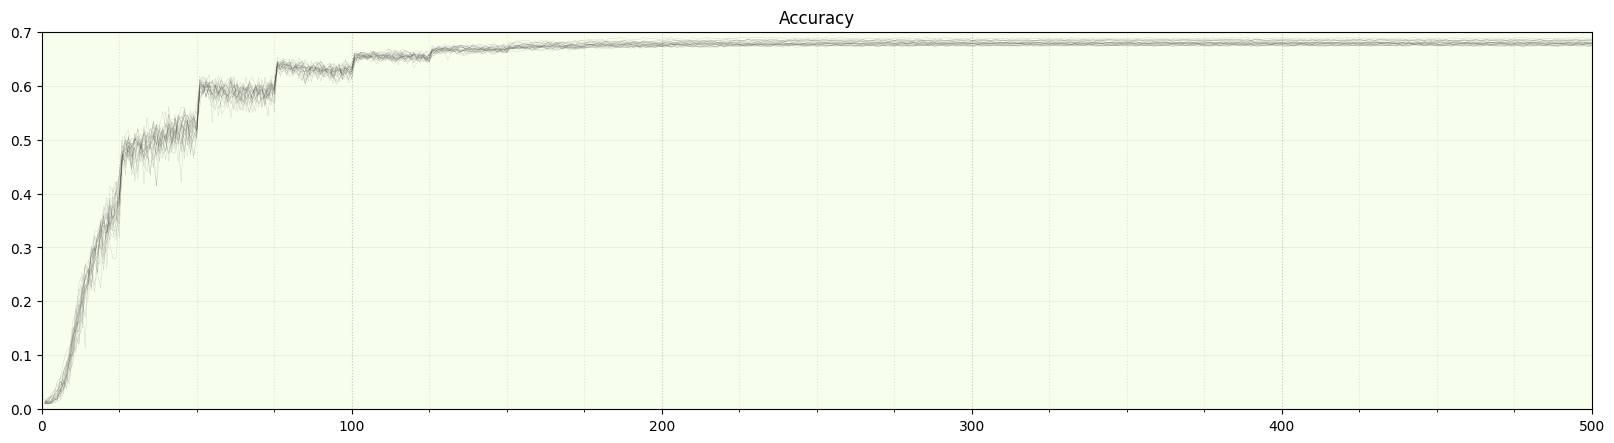

In [784]:
ax = plot(df_acc,legend=False,figsize=(20,5),linewidth=0.2,color="#333333",alpha=0.3)
ax.set_title("Accuracy")
ax.set_xlabel("")
ax.set_ylim(0,.7)
ax.set_facecolor("#F7FEEB")

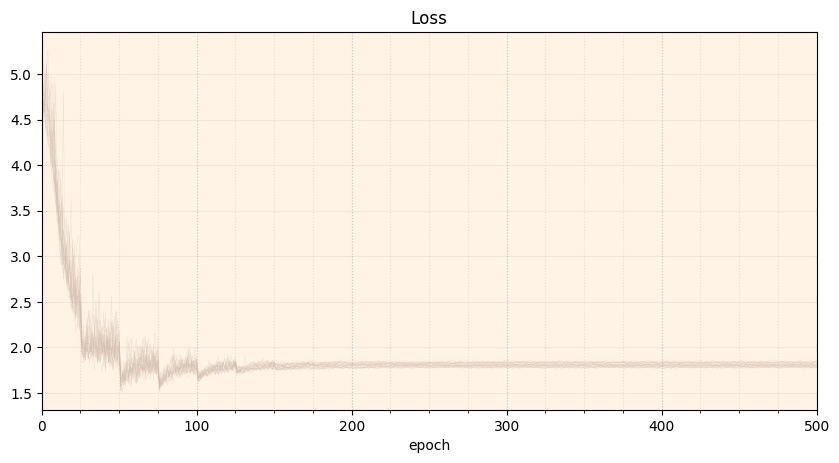

In [769]:
ax = plot(df_loss,legend=False,figsize=(10,5),linewidth=0.2,color="#D3BDB1",alpha=0.5)
ax.set_title("Loss")
ax.set_facecolor("#FEF3E5")

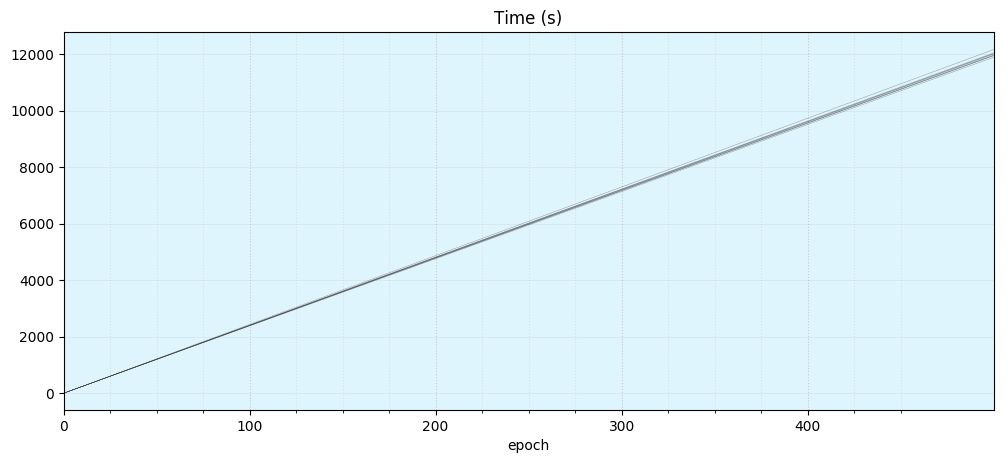

In [630]:
ax = plot(df_time,legend=False,figsize=(12,5),linewidth=0.2,color="#333333",alpha=0.3)
ax.set_title("Time (s)")
#ax.set_ylabel("s")
ax.set_facecolor("#00B7FA20")

In [139]:
# Save data to CSV files
logfile = os.path.join(logs_directory,"cifar_e500")
df_loss.to_csv(logfile+"-loss.csv")
df_acc.to_csv(logfile+"-acc.csv")
df_time.to_csv(logfile+"-time.csv")

In [607]:
def RelativePercentDifference(ser):
    mean = ser.mean()
    ser = ser.apply(lambda x: x/mean*100)
    return ser

In [797]:
slice_epoch = [10.,40.,50.,200.,500.]
df_loss.iloc[-3:]

run,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
epoch,,,,,,,,,,,,,,,,,,,,,
498.0,1.81939,1.79402,1.80293,1.80973,1.83211,1.79469,1.80163,1.80814,1.82611,1.78958,...,1.81056,1.78970,1.78142,1.82420,1.80977,1.84239,1.84400,1.82956,1.83150,1.84168
499.0,1.81122,1.79418,1.79870,1.80697,1.83592,1.79338,1.80714,1.80411,1.83864,1.78253,...,1.80119,1.78153,1.78211,1.81353,1.81332,1.84139,1.84518,1.82717,1.83663,1.85992
500.0,1.81856,1.79908,1.80410,1.81003,1.83988,1.80571,1.81240,1.80712,1.84095,1.77764,...,1.79906,1.78182,1.77949,1.81310,1.81139,1.82437,1.83408,1.83525,1.83246,1.84279


In [798]:
df_loss_p = df_loss.copy()
df_acc_p = df_acc.copy()
df_time_p = df_time.copy()
i = 0
index = []
for i in range(0,len(slice_epoch)):
    name = str(int(slice_epoch[i]))
    index.append(name)
    df_loss_p.loc[name] = RelativePercentDifference(df_loss_p.loc[slice_epoch[i]])
    df_acc_p.loc[name] = RelativePercentDifference(df_acc_p.loc[slice_epoch[i]])
    df_time_p.loc[name] = RelativePercentDifference(df_time_p.loc[slice_epoch[i]])
df_loss_p.iloc[-5:]

run,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
epoch,,,,,,,,,,,,,,,,,,,,,
10,95.949809,92.704820,95.055751,98.186746,95.381213,92.531075,96.035168,105.888536,102.699993,92.009288,...,104.095187,112.542072,104.758779,101.583453,105.987111,98.196383,100.638454,105.719472,99.135874,97.927917
40,92.104320,95.520719,101.390283,96.833771,88.047901,104.811116,99.804274,100.135863,104.908179,94.707267,...,106.276413,98.127607,102.687076,96.953498,118.144138,102.599375,95.982381,96.224298,103.626167,100.393053
50,94.865445,99.108217,107.809819,97.217460,105.279933,101.390390,98.999184,103.168596,103.861489,98.003308,...,102.194829,101.984801,86.129174,104.099655,103.952434,98.598723,90.132775,102.394808,102.448571,100.355825
200,100.941237,98.732815,100.546127,100.361264,100.819835,99.316099,99.849718,100.232688,100.756375,98.001641,...,100.381130,98.682047,98.570025,99.705691,99.605810,100.543368,101.664686,100.613451,101.462717,102.196650
500,100.408647,99.333093,99.610263,99.937678,101.585794,99.699157,100.068533,99.777007,101.644872,98.149320,...,99.331988,98.380112,98.251465,100.107183,100.012768,100.729436,101.265557,101.330157,101.176112,101.746465


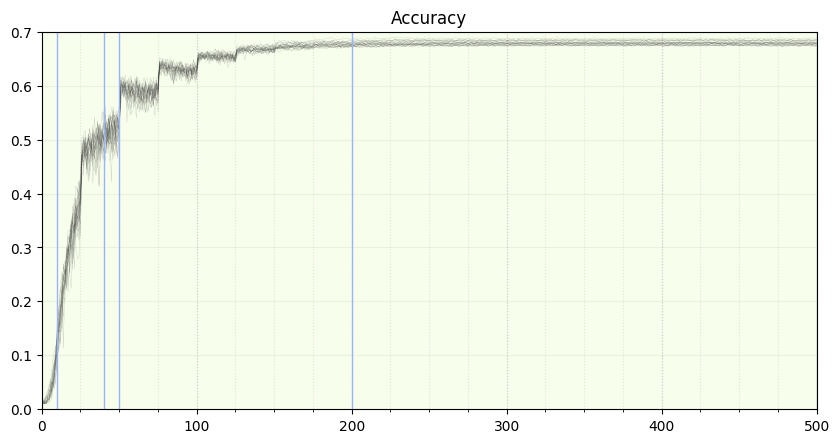

In [799]:
ax = plot(df_acc,legend=False,figsize=(10,5),linewidth=0.2,color="#333333",alpha=0.3)
ax.set_title("Accuracy")
ax.set_xlabel("")
ax.set_facecolor("#F7FEEB")
ax.set_ylim(0,0.7)
for sl in slice_epoch:
    xx = [sl,sl]
    yy = [0,0.7]
    ax.plot(xx,yy,lw=1,color=(.6,.7,1))

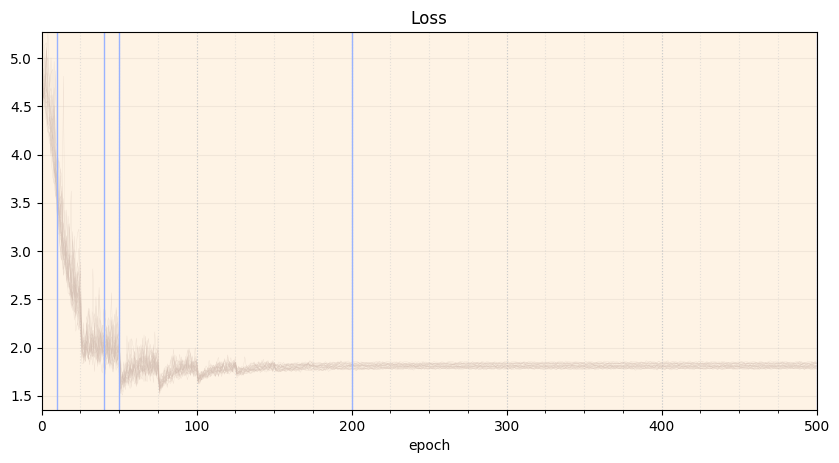

In [800]:
ax = plot(df_loss,legend=False,figsize=(10,5),linewidth=0.2,color="#D3BDB1",alpha=0.5)
ax.set_title("Loss")
ax.set_facecolor("#FEF3E5")
ymin = df_loss.min().min()*0.9 
ymax = df_loss.max().max()*1. 
ax.set_ylim(ymin,ymax)
for sl in slice_epoch:
    xx = [sl,sl]
    yy = [ymin,ymax]
    ax.plot(xx,yy,lw=1,color=(.6,.7,1))

In [758]:
def plotBox(df, **kwargs):
    boxcolor=(.3,.3,.3)
    meanlineprops = dict(linewidth=1, color=(.7,.7,.8), linestyle="--")
    medianprops = dict(linestyle='-', linewidth=1)
    color = dict(caps=boxcolor,whiskers=boxcolor,boxes=boxcolor, medians=boxcolor)
    (ax,lines) = df.plot.box(showmeans=True, meanline=True, patch_artist=False,
                    color=color, meanprops=meanlineprops, medianprops=medianprops,
                    return_type='both',**kwargs)
#    print lines.keys()
    ax.yaxis.grid(linestyle=":",color="#cccccc")
# #     plotText(ax, lines)
# #     ["medians"],"median")
# #     plotText(ax, lines["means"],"mean")
# #     plotText(ax, lines["boxes"],"quartile")
# #     plotText(ax, lines["caps"],"caps")
# #    box = ax.artists[0]
#     #box.set_facecolor("#eeeeee")
    
#     for median in lines["medians"]:
#         x,y = median.get_data()
#         padding = 0.01
#         ax.text(x[0]+padding, y[0]-0.0001, 'median', style='italic',
#             verticalalignment='top', horizontalalignment='left',
#             color=(.6,.6,.6), fontsize=6)
#     for mean in lines["means"]:
#         x,y = mean.get_data()
#         padding = 0.01
#         ax.text(x[0]+padding, y[0]+0.0007, 'mean', style='italic',
#             verticalalignment='top', horizontalalignment='left',
#             color=(.6,.6,.6), fontsize=6)
    return ax

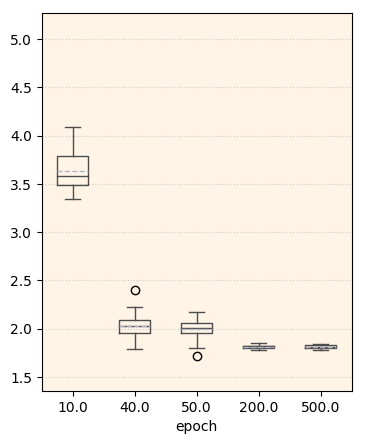

In [801]:
ax = plotBox(df_loss_p.loc[slice_epoch].T,figsize=(4,5))
#ax.set_title("Loss")
ax.set_xlabel("epoch")
ymin = df_loss.min().min()*0.9 
ymax = df_loss.max().max()*1. 
ax.set_ylim(ymin,ymax)
#ax.set_xticklabels(df.C)
ax.set_facecolor("#FFAC3620")

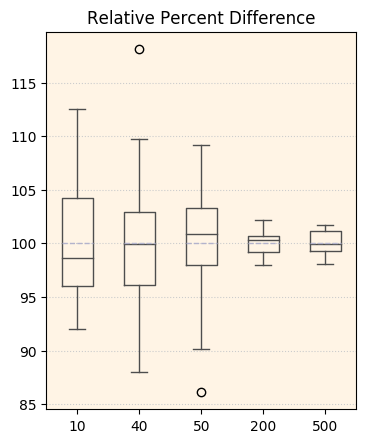

In [802]:
ax = plotBox(df_loss_p.loc[index].T,figsize=(4,5))
ax.set_title("Relative Percent Difference")
ax.set_facecolor("#FFAC3620")

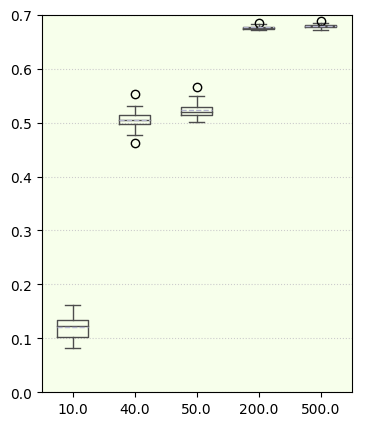

In [803]:
ax = plotBox(df_acc_p.loc[slice_epoch].T,figsize=(4,5))
#ax.set_title("Accuracy")
#ax.set_xlabel("epoch")
ax.set_ylim(0,0.7)
ax.set_facecolor("#CBFF7725")

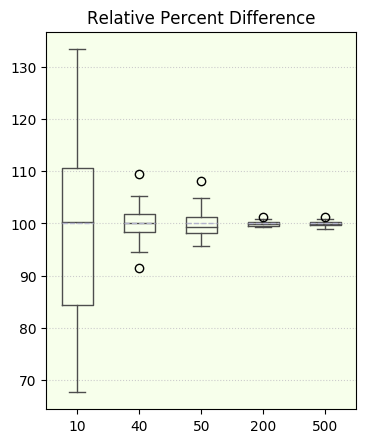

In [804]:
ax = plotBox(df_acc_p.loc[index].T,figsize=(4,5))
ax.set_title("Relative Percent Difference")
#ax.set_xlabel("epoch")
ax.set_facecolor("#CBFF7725")